# MNIST digit classification

## Objective

To identify handwritten digits

## Dataset

 MNIST dataset has 70,000 images of handwritten digits like shown below,

![MNIST Dataset example](https://i2.wp.com/syncedreview.com/wp-content/uploads/2019/06/MNIST.png?fit=530%2C297&ssl=1)

Out of 70,000 images 60,000 images are for training and 10,000 images are for testing


## Steps involved in new netwok learning tasks

![steps involved in new netwok learning tasks](https://miro.medium.com/max/700/0*C_ibLD-RscbJzjMq.png)

In the following example we are going to see each steps in detail.


In [25]:
### Import neccessary python modules

In [1]:
%matplotlib inline
# TF version: 2.1.0
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
import itertools


/home/tobi/bigdata/uebungen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tobi/bigdata/uebungen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tobi/bigdata/uebungen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tobi/bigdata/uebungen/lib/python3.6/site-packages/tensorflow/

### save the trained model

Saving the model after training is necessary for the following purposes:

- to predict the input data
- to continue the training from you left previously
- for transfer learning: learn from past experience. In most of the case, you need to do transfer learning of models that are pre-trained with lot of samples

In [2]:
def save_model(model, save_dir=".", model_name = 'model.h5'):

    savemodules_dir = os.path.abspath(save_dir)

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    model_path = os.path.join(save_dir, model_name)
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)

### function to plot confusion matrix
Plots a matrix to see how many true positives and false positives were predicted from the input samples

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model / data parameters


In [4]:
num_classes = 10 # number of objects to identify from an input image
input_shape = (28, 28, 1) # shape of the input image

### Load the data and split them as train and test sets

Normally you will have 1000s of images stored in a directory. These image has to be loaded and splitted into training samples, test and/or validataion samples.

In the following case, we are using dataset that is already available from tensorflow repository

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test_raw = x_test[:]
y_test_raw = y_test[:]


### Showing few images and its output from the dataset

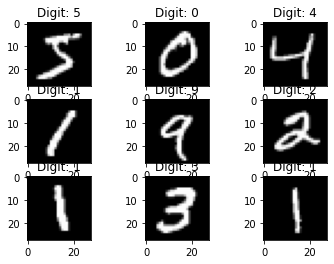

In [6]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title("Digit: {}".format(y_train[i]))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

### preprocessing input and ouput data

It is very important step in any neural network based learning. 

Normally following operations will be performed:

- Data Augmentation: manipulating images by flipping, rotating, etc
- Data Normalization: dividing image pixel by the maximum value of the image or by subtracting each pixel by the mean value and dividing them again by their standard deviation.

In the following case, we are just doing data normalization to by converting 8bit image represented by 0 - 255 to 0 - 1. This step is important, because large values of the image can blow up the learning process and can take forever to finish.



In [7]:

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Contruct the Convolutional Neural Network model

In [8]:
def construct_model():
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    return model


In [9]:

model = construct_model()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
### print the model summary to see shapes of output from each layer

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

### The above summary can also be plotted as a graph

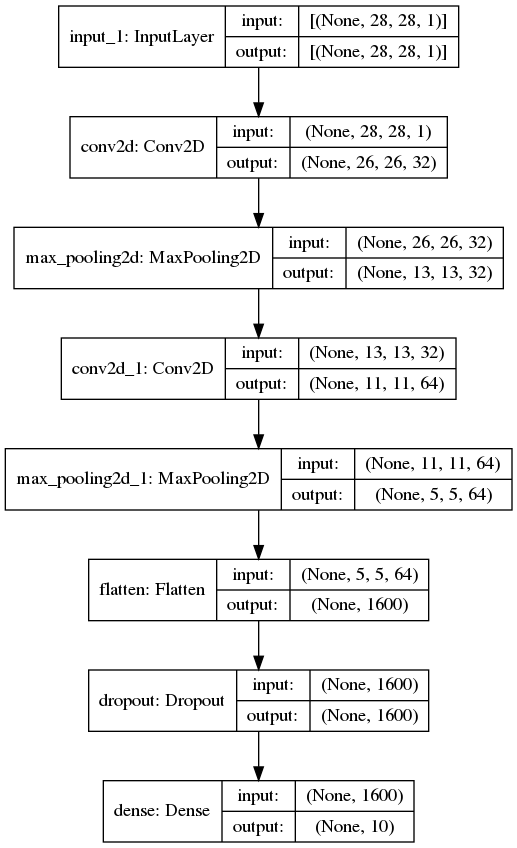

In [11]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

### Train the network with the input samples

In [20]:
batch_size = 128
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 20s 365us/sample - loss: 0.0888 - acc: 0.9732 - val_loss: 0.0526 - val_acc: 0.9863

In [21]:
save_model(model)

Saved trained model at ./model.h5 


### Evaluate the model with set of test samples

In [29]:

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025449964992917375
Test accuracy: 0.991


### plotting the metrics

Plotting the training metrics gives an idea what happens to the loss function on each epoch


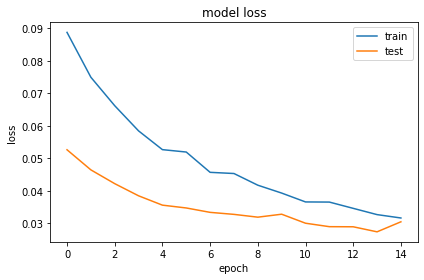

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

### Load a saved model

#trained_model = keras.models.load_model("model.h5")


### Predicting an image

In [33]:
predicted_classes = model.predict_classes(x_test)


### check how many images got predicted correctly

In [34]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test_raw)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_raw)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

9910  classified correctly
90  classified incorrectly


### Show some correctly predicted output and its input image

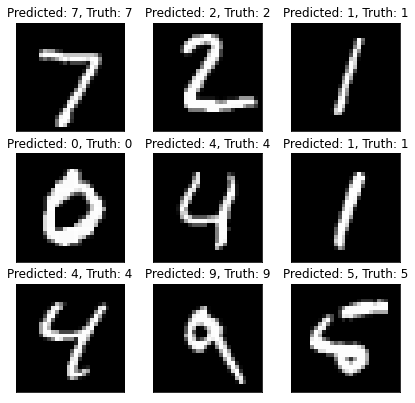

In [35]:
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test_raw[correct]))
    plt.xticks([])
    plt.yticks([])

plt.show()

### Show some wrongly predicted output and its input image

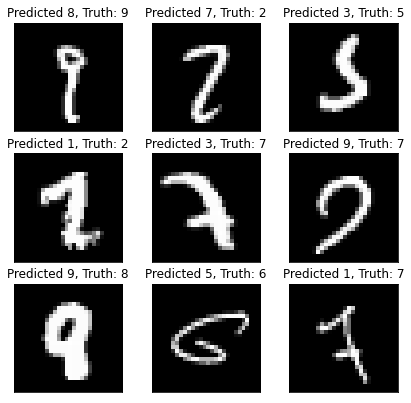

In [36]:
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test_raw[incorrect]))
    plt.xticks([])
    plt.yticks([])

### Plotting confusion matrix

Confusion matrix gives a good picture about the trained model, indicating number of true preditions and false preditions

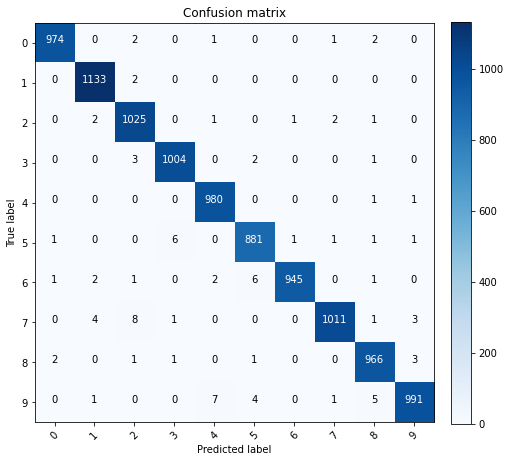

In [37]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


### Result of the combined first activation

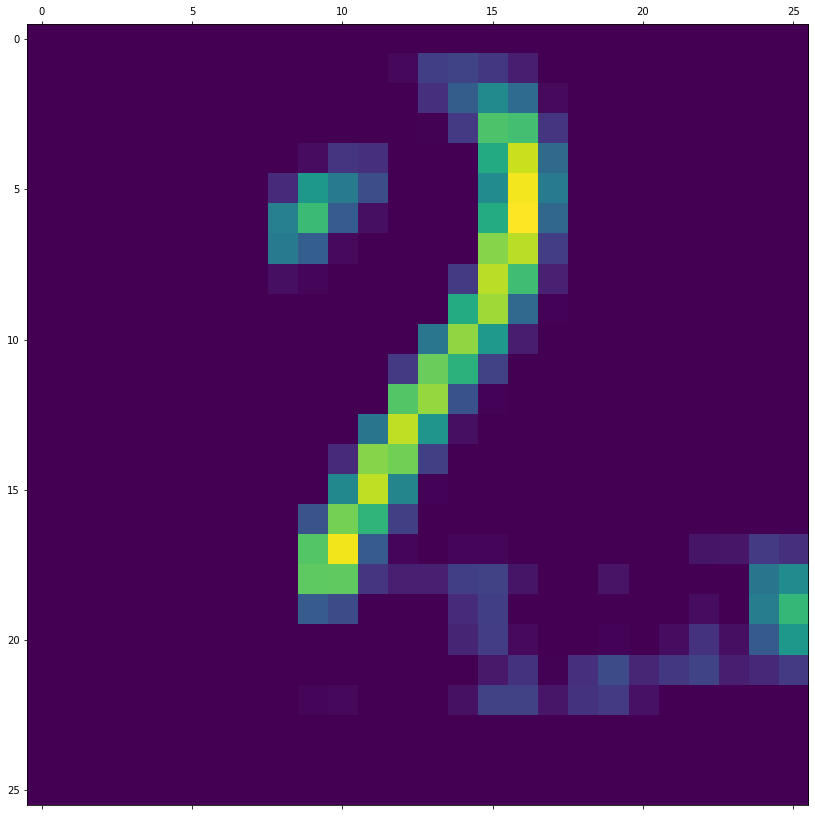

In [39]:
img_tensor = x_test[1]
img_tensor = np.expand_dims(img_tensor, axis=0)

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


### show the result of the intermediate layers

Output of the intermediate layers indicates what the network learns at each layer

/home/tobi/bigdata/uebungen/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


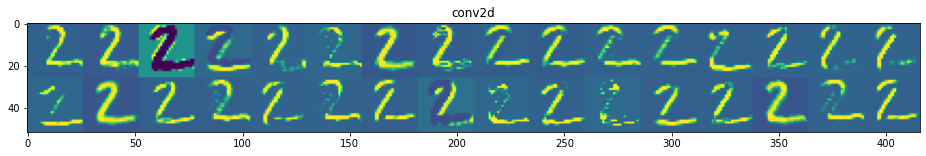

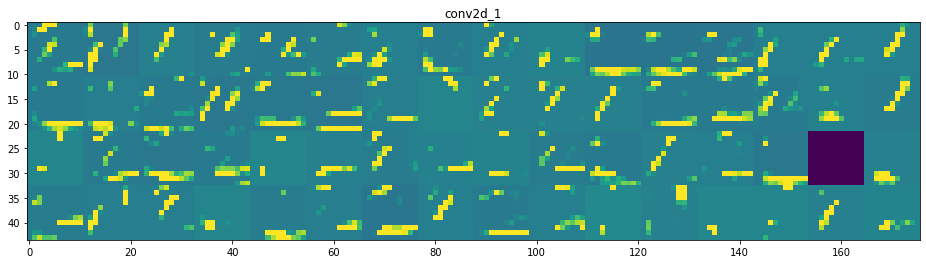

In [40]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
